<a href="https://colab.research.google.com/github/reza-pishva/1-SchoolProject-Php-Laravel/blob/main/classifiers_main_trans_ansaldo_32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
import warnings # Ignore specific warnings
warnings.filterwarnings("ignore")

In [ ]:
df1 = pd.read_csv('dsas32_main_trans.csv')

In [ ]:
df_test = df1[(df1['UnitID']==32) & (df1['Job'] == 'Operation') & (df1['IsDeleted'] == 0) & (df1['ValueType'] == 1) & (df1['AssetID'] == 11100) & (df1['Value'] > 0)]
df_test = df_test.drop(columns=['PersonelID', 'MobileID', 'Job', 'IsDeleted','OutofRange','ValueType','UnitID','OnTime'])
df_test.head()

,ID,AssetID,Value,RecordTime,RecordDate,DateTime,TimeStamp,ShiftCode
0,1077706,11100,62.0,17:48:05,2021/03/21,2021-03-21 17:48:05.000,1616336285,12
4,1078013,11100,55.0,23:23:53,2021/03/21,2021-03-21 23:23:53.000,1616356433,12
8,1078383,11100,47.0,05:49:15,2021/03/22,2021-03-22 05:49:15.000,1616375955,12
12,1078838,11100,62.0,11:31:23,2021/03/22,2021-03-22 11:31:23.000,1616396483,20210322094711
16,1079218,11100,57.0,17:49:22,2021/03/22,2021-03-22 17:49:22.000,1616419162,20210322094711


In [ ]:
filtered_df = df1[(df1['UnitID']==32) & (df1['Job'] == 'Operation') & (df1['IsDeleted'] == 0) & (df1['ValueType'] == 1)]
result_df = filtered_df.drop(columns=['PersonelID', 'MobileID', 'Job', 'IsDeleted','OutofRange','ValueType','UnitID','OnTime'])
result_df.head()

,ID,AssetID,Value,RecordTime,RecordDate,DateTime,TimeStamp,ShiftCode
0,1077706,11100,62.0,17:48:05,2021/03/21,2021-03-21 17:48:05.000,1616336285,12
1,1077707,11101,73.0,17:48:09,2021/03/21,2021-03-21 17:48:09.000,1616336289,12
2,1077708,11102,62.0,17:48:13,2021/03/21,2021-03-21 17:48:13.000,1616336293,12
3,1077709,11103,4.0,17:48:17,2021/03/21,2021-03-21 17:48:17.000,1616336297,12
4,1078013,11100,55.0,23:23:53,2021/03/21,2021-03-21 23:23:53.000,1616356433,12


In [ ]:
number_of_rows = result_df.shape[0]
print("Number of rows:", number_of_rows)

Number of rows: 13658


In [ ]:
# AssetIDs to check
asset_ids_to_check = [11100,11101,11102,11103]

# Filter the DataFrame to include only the specified AssetIDs
filtered_df = result_df[result_df['AssetID'].isin(asset_ids_to_check)]

# Initialize a list to keep track of valid ShiftCodes
valid_shiftcodes = []

# Iterate through each ShiftCode and check the count of each AssetID
for shift_code in filtered_df['ShiftCode'].unique():
    shift_code_df = filtered_df[filtered_df['ShiftCode'] == shift_code]
    asset_count = shift_code_df['AssetID'].value_counts()

    if all(asset_count == 2):
        valid_shiftcodes.append(shift_code)

# Filter the original DataFrame to keep only the rows with valid ShiftCodes
result_df = result_df[result_df['ShiftCode'].isin(valid_shiftcodes)]
result_df['AssetID'].value_counts()

,count
AssetID,
11100,2292
11101,2292
11102,2292
11103,2292


In [ ]:
def plot_and_display(asset_id , date1 , date2):
    # Filter the DataFrame for the given AssetID
    filtered_df = result_df[result_df['AssetID'] == asset_id]

    # Combine RecordDate and RecordTime into a single datetime column
    filtered_df['DateTime'] = pd.to_datetime(filtered_df['RecordDate'] + ' ' + filtered_df['RecordTime'])

    # Sort the DataFrame by DateTime
    filtered_df = filtered_df.sort_values(by='DateTime')

    # Filter the DataFrame for the first month of 2022
    filtered_df = filtered_df[(filtered_df['DateTime'] >= date1) & (filtered_df['DateTime'] <= date2)]
    plt.figure(figsize=(5, 3))
    filtered_df['Value'].hist()

    # Display the DataFrame as HTML
    # display(HTML(filtered_df[['ShiftCode','RecordDate', 'RecordTime','Value']].to_html(max_rows=None)))

    # Plot the data
    # plt.figure(figsize=(5,3))
    # plt.plot(filtered_df['DateTime'], filtered_df['Value'], marker='o', linestyle='-')
    # plt.xlabel('DateTime')
    # plt.ylabel('Value')
    # plt.title(f'Value vs. DateTime for January 2022 - AssetID {asset_id}')
    # plt.xticks(rotation=45)
    # plt.grid(True)
    # plt.tight_layout()
    # plt.show()

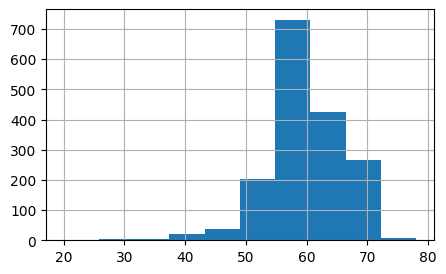

In [ ]:
plot_and_display(11100,'2022-01-01','2024-06-01')
#Main Trans. Oil Temp.

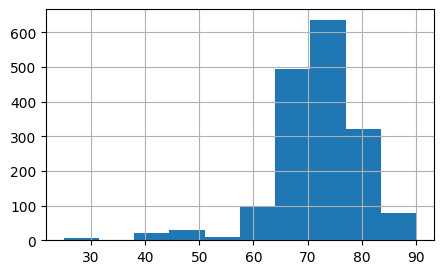

In [ ]:
plot_and_display(11101,'2022-01-01','2024-06-01')
#Main Trans. Winding Temp.

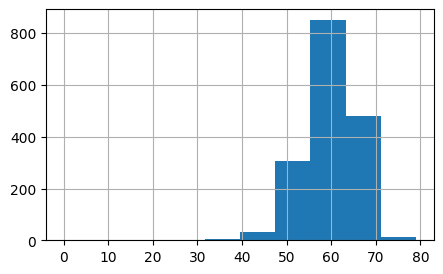

In [ ]:
plot_and_display(11102,'2022-01-01','2024-06-01')
#Main Trans.Cooling Temp

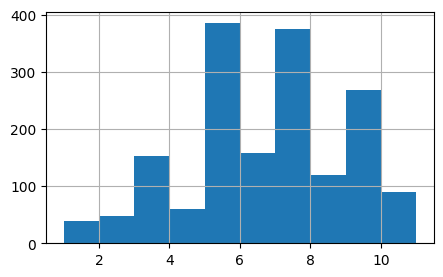

In [ ]:
plot_and_display(11103,'2022-01-01','2024-06-01')
#Main Trans.Tap Position

In [ ]:
def df_preparing(asset_id1 ,asset_id2 ,asset_id3 ,asset_id4,date1 , date2):
    # Filter the DataFrame for the given AssetID
    filtered_df1 = result_df[result_df['AssetID'] == asset_id1]
    filtered_df2 = result_df[result_df['AssetID'] == asset_id2]
    filtered_df3 = result_df[result_df['AssetID'] == asset_id3]
    filtered_df4 = result_df[result_df['AssetID'] == asset_id4]
    # filtered_df5 = result_df[result_df['AssetID'] == asset_id5]
    # filtered_df6 = result_df[result_df['AssetID'] == asset_id6]
    # filtered_df7 = result_df[result_df['AssetID'] == asset_id7]
    # filtered_df8 = result_df[result_df['AssetID'] == asset_id8]
    # filtered_df9 = result_df[result_df['AssetID'] == asset_id9]
    # filtered_df10 = result_df[result_df['AssetID'] == asset_id10]
    # filtered_df11 = result_df[result_df['AssetID'] == asset_id11]
    # filtered_df12 = result_df[result_df['AssetID'] == asset_id12]
    # filtered_df13 = result_df[result_df['AssetID'] == asset_id13]



    # Combine RecordDate and RecordTime into a single datetime column
    filtered_df1['DateTime'] = pd.to_datetime(filtered_df1['RecordDate'] + ' ' + filtered_df1['RecordTime'])
    filtered_df2['DateTime'] = pd.to_datetime(filtered_df2['RecordDate'] + ' ' + filtered_df2['RecordTime'])
    filtered_df3['DateTime'] = pd.to_datetime(filtered_df3['RecordDate'] + ' ' + filtered_df3['RecordTime'])
    filtered_df4['DateTime'] = pd.to_datetime(filtered_df4['RecordDate'] + ' ' + filtered_df4['RecordTime'])
    # filtered_df5['DateTime'] = pd.to_datetime(filtered_df5['RecordDate'] + ' ' + filtered_df5['RecordTime'])
    # filtered_df6['DateTime'] = pd.to_datetime(filtered_df6['RecordDate'] + ' ' + filtered_df6['RecordTime'])
    # filtered_df7['DateTime'] = pd.to_datetime(filtered_df7['RecordDate'] + ' ' + filtered_df7['RecordTime'])
    # filtered_df8['DateTime'] = pd.to_datetime(filtered_df8['RecordDate'] + ' ' + filtered_df8['RecordTime'])
    # filtered_df9['DateTime'] = pd.to_datetime(filtered_df9['RecordDate'] + ' ' + filtered_df9['RecordTime'])
    # filtered_df10['DateTime'] = pd.to_datetime(filtered_df10['RecordDate'] + ' ' + filtered_df10['RecordTime'])
    # filtered_df11['DateTime'] = pd.to_datetime(filtered_df11['RecordDate'] + ' ' + filtered_df11['RecordTime'])
    # filtered_df12['DateTime'] = pd.to_datetime(filtered_df12['RecordDate'] + ' ' + filtered_df12['RecordTime'])
    # filtered_df13['DateTime'] = pd.to_datetime(filtered_df13['RecordDate'] + ' ' + filtered_df13['RecordTime'])




    # Sort the DataFrame by DateTime
    filtered_df1 = filtered_df1.sort_values(by='DateTime')
    filtered_df2 = filtered_df2.sort_values(by='DateTime')
    filtered_df3 = filtered_df3.sort_values(by='DateTime')
    filtered_df4 = filtered_df4.sort_values(by='DateTime')
    # filtered_df5 = filtered_df5.sort_values(by='DateTime')
    # filtered_df6 = filtered_df6.sort_values(by='DateTime')
    # filtered_df7 = filtered_df7.sort_values(by='DateTime')
    # filtered_df8 = filtered_df8.sort_values(by='DateTime')
    # filtered_df9 = filtered_df9.sort_values(by='DateTime')
    # filtered_df10 = filtered_df10.sort_values(by='DateTime')
    # filtered_df11 = filtered_df11.sort_values(by='DateTime')
    # filtered_df12 = filtered_df12.sort_values(by='DateTime')
    # filtered_df13 = filtered_df13.sort_values(by='DateTime')



    # Filter the DataFrame for the first month of 2022
    lube_oil_df1 = filtered_df1[(filtered_df1['DateTime'] >= date1) & (filtered_df1['DateTime'] <= date2)]
    lube_oil_df2 = filtered_df2[(filtered_df2['DateTime'] >= date1) & (filtered_df2['DateTime'] <= date2)]
    lube_oil_df3 = filtered_df3[(filtered_df3['DateTime'] >= date1) & (filtered_df3['DateTime'] <= date2)]
    lube_oil_df4 = filtered_df4[(filtered_df4['DateTime'] >= date1) & (filtered_df4['DateTime'] <= date2)]
    # lube_oil_df5 = filtered_df5[(filtered_df5['DateTime'] >= date1) & (filtered_df5['DateTime'] <= date2)]
    # lube_oil_df6 = filtered_df6[(filtered_df6['DateTime'] >= date1) & (filtered_df6['DateTime'] <= date2)]
    # lube_oil_df7 = filtered_df7[(filtered_df7['DateTime'] >= date1) & (filtered_df7['DateTime'] <= date2)]
    # lube_oil_df8 = filtered_df8[(filtered_df8['DateTime'] >= date1) & (filtered_df8['DateTime'] <= date2)]
    # lube_oil_df9 = filtered_df9[(filtered_df9['DateTime'] >= date1) & (filtered_df9['DateTime'] <= date2)]
    # lube_oil_df10 = filtered_df10[(filtered_df10['DateTime'] >= date1) & (filtered_df10['DateTime'] <= date2)]
    # lube_oil_df11 = filtered_df11[(filtered_df11['DateTime'] >= date1) & (filtered_df11['DateTime'] <= date2)]
    # lube_oil_df12 = filtered_df12[(filtered_df12['DateTime'] >= date1) & (filtered_df12['DateTime'] <= date2)]
    # lube_oil_df13 = filtered_df13[(filtered_df13['DateTime'] >= date1) & (filtered_df13['DateTime'] <= date2)]

    # Display the DataFrame as HTML
    number_of_rows1 = lube_oil_df1.shape[0]
    number_of_rows2 = lube_oil_df2.shape[0]
    number_of_rows3 = lube_oil_df3.shape[0]
    number_of_rows4 = lube_oil_df4.shape[0]
    # number_of_rows5 = lube_oil_df5.shape[0]
    # number_of_rows6 = lube_oil_df6.shape[0]
    # number_of_rows7 = lube_oil_df7.shape[0]
    # number_of_rows8 = lube_oil_df8.shape[0]
    # number_of_rows9 = lube_oil_df9.shape[0]
    # number_of_rows10 = lube_oil_df10.shape[0]
    # number_of_rows11 = lube_oil_df11.shape[0]
    # number_of_rows12 = lube_oil_df12.shape[0]
    # number_of_rows13 = lube_oil_df13.shape[0]


    lube_oil_df1.dropna(subset=['Value'])
    lube_oil_df2.dropna(subset=['Value'])
    lube_oil_df3.dropna(subset=['Value'])
    lube_oil_df4.dropna(subset=['Value'])
    # lube_oil_df5.dropna(subset=['Value'])
    # lube_oil_df6.dropna(subset=['Value'])
    # lube_oil_df7.dropna(subset=['Value'])
    # lube_oil_df8.dropna(subset=['Value'])
    # lube_oil_df9.dropna(subset=['Value'])
    # lube_oil_df10.dropna(subset=['Value'])
    # lube_oil_df11.dropna(subset=['Value'])
    # lube_oil_df12.dropna(subset=['Value'])
    # lube_oil_df13.dropna(subset=['Value'])


    print("Number of rows1:", number_of_rows1)
    print("Number of rows2:", number_of_rows2)
    print("Number of rows3:", number_of_rows3)
    print("Number of rows4:", number_of_rows4)
    # print("Number of rows5:", number_of_rows5)
    # print("Number of rows6:", number_of_rows6)
    # print("Number of rows7:", number_of_rows7)
    # print("Number of rows8:", number_of_rows4)
    # print("Number of rows9:", number_of_rows1)
    # print("Number of rows10:", number_of_rows2)
    # print("Number of rows11:", number_of_rows3)
    # print("Number of rows12:", number_of_rows4)
    # print("Number of rows13:", number_of_rows4)


    # Ensure both DataFrames are properly indexed
    df1 = lube_oil_df1.reset_index(drop=True)
    df2 = lube_oil_df2.reset_index(drop=True)
    df3 = lube_oil_df3.reset_index(drop=True)
    df4 = lube_oil_df4.reset_index(drop=True)
    # df5 = lube_oil_df5.reset_index(drop=True)
    # df6 = lube_oil_df6.reset_index(drop=True)
    # df7 = lube_oil_df7.reset_index(drop=True)
    # df8 = lube_oil_df8.reset_index(drop=True)
    # df9 = lube_oil_df9.reset_index(drop=True)
    # df10 = lube_oil_df10.reset_index(drop=True)
    # df11 = lube_oil_df11.reset_index(drop=True)
    # df12 = lube_oil_df12.reset_index(drop=True)
    # df13 = lube_oil_df13.reset_index(drop=True)



    # Create a new DataFrame by concatenating the 'Value' columns from each DataFrame
    combined_df = pd.concat([df1['Value'], df2['Value'], df3['Value'], df4['Value']], axis=1)
    print("Number of concat rows:", combined_df.shape[0])
    # Rename the columns
    combined_df.columns = ['Main Trans. Oil Temp.',
                           'Main Trans. Winding Temp.',
                           'Main Trans.Cooling Temp',
                           'Main Trans.Tap Position']
    # Display the new DataFrame
    # display(HTML(combined_df.to_html(max_rows=10)))

    # Remove rows with NaN values
    combined_df = combined_df.dropna()
    return combined_df

In [ ]:
df = df_preparing(11100,11101,11102,11103,'2022-01-01' , '2024-01-10')
# Convert specific columns to numeric
df['Main Trans. Oil Temp.'] = pd.to_numeric(df['Main Trans. Oil Temp.'])
df['Main Trans. Winding Temp.'] = pd.to_numeric(df['Main Trans. Winding Temp.'])
df['Main Trans.Cooling Temp'] = pd.to_numeric(df['Main Trans.Cooling Temp'])
df['Main Trans.Tap Position'] = pd.to_numeric(df['Main Trans.Tap Position'])
# df['FULE OIL LEAK PRESS'] = pd.to_numeric(df['FULE OIL LEAK PRESS'])
# df['INJECTION FILTER DP'] = pd.to_numeric(df['INJECTION FILTER DP'])
# df['INJ. PUMP INLET PRESS'] = pd.to_numeric(df['INJ. PUMP INLET PRESS'])
# df['INJ. PUMP OUT LET PRESS'] = pd.to_numeric(df['INJ. PUMP OUT LET PRESS'])
# df['FORWARD LINE PRESS'] = pd.to_numeric(df['FORWARD LINE PRESS'])
# df['RETERN LINE PRESS'] = pd.to_numeric(df['RETERN LINE PRESS'])

Number of rows1: 1693
Number of rows2: 1693
Number of rows3: 1693
Number of rows4: 1693
Number of concat rows: 1693


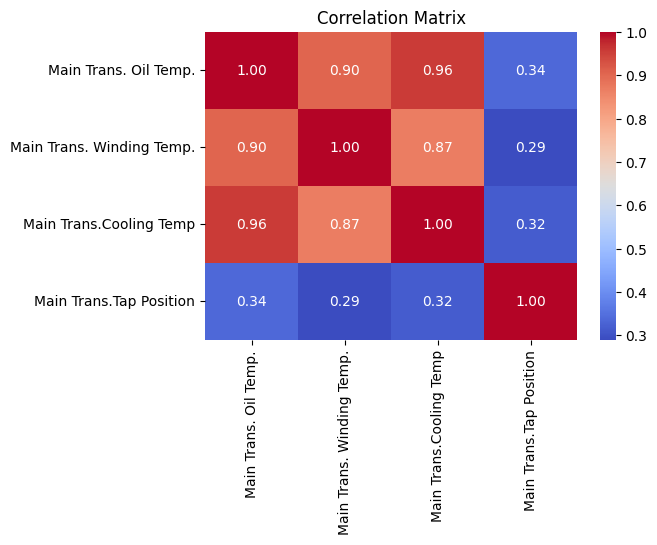

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df.head()

,Main Trans. Oil Temp.,Main Trans. Winding Temp.,Main Trans.Cooling Temp,Main Trans.Tap Position
0,53.0,70.0,54.0,7.0
1,53.0,69.0,53.0,7.0
2,55.0,71.0,56.0,7.0
3,52.0,64.0,52.0,7.0
4,51.0,63.0,51.0,7.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Main Trans. Oil Temp.      1693 non-null   float64
 1   Main Trans. Winding Temp.  1693 non-null   float64
 2   Main Trans.Cooling Temp    1693 non-null   float64
 3   Main Trans.Tap Position    1693 non-null   float64
dtypes: float64(4)
memory usage: 53.0 KB


In [ ]:
df['Main Trans. Winding Temp.'].max()

90.0

<Axes: >

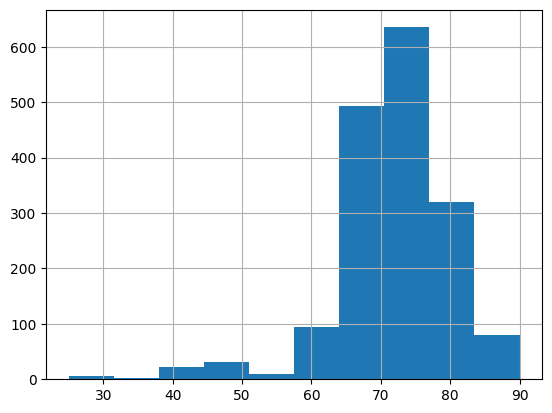

In [ ]:
df['Main Trans. Winding Temp.'].hist()

In [ ]:
df['Main Trans. Winding Temp.'].min()

25.0

In [ ]:
# Replace 'OIL TEP.AFTER FILTER' values
df['Main Trans. Winding Temp.'] = df['Main Trans. Winding Temp.'].apply(lambda x: 1 if x > 85 else 0)

In [ ]:
# Separate the majority and minority classes
df_majority = df[df['Main Trans. Winding Temp.'] == 0]
df_minority = df[df['Main Trans. Winding Temp.'] == 1]

# Up-sample the minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # Match the number of samples in majority class
                                 random_state=42)  # Reproducible results

# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])

print(df['Main Trans. Winding Temp.'].value_counts())

Main Trans. Winding Temp.
0    1666
1    1666
Name: count, dtype: int64


In [ ]:
# Display unique labels and their counts
label_counts = np.unique(df['Main Trans. Winding Temp.'], return_counts=True)
label_counts

(array([0, 1]), array([1666, 1666]))

In [ ]:
targets = df['Main Trans. Winding Temp.'].value_counts()
targets

,count
Main Trans. Winding Temp.,
0,1666
1,1666


In [ ]:
# Create a new DataFrame with inputs and target
input_features = ['Main Trans. Oil Temp.',
                  'Main Trans.Tap Position',
                  'Main Trans.Cooling Temp']
target_feature = ['Main Trans. Winding Temp.']

In [ ]:
# Splitting the dataset into inputs (X) and target (y)
X = df[input_features]
y = df[target_feature]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3332 entries, 0 to 435
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Main Trans. Oil Temp.    3332 non-null   float64
 1   Main Trans.Tap Position  3332 non-null   float64
 2   Main Trans.Cooling Temp  3332 non-null   float64
dtypes: float64(3)
memory usage: 104.1 KB


In [ ]:
X.head()

,Main Trans. Oil Temp.,Main Trans.Tap Position,Main Trans.Cooling Temp
0,53.0,7.0,54.0
1,53.0,7.0,53.0
2,55.0,7.0,56.0
3,52.0,7.0,52.0
4,51.0,7.0,51.0


In [ ]:
# Splitting the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Summarize the results
print(f"Input Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")
print("Feature scaling completed.")

Input Features Shape: (3332, 3)
Target Shape: (3332, 1)
Feature scaling completed.


In [ ]:
# Create new DataFrames with the scaled inputs
X_train_df = pd.DataFrame(X_train_scaled, columns=input_features)
X_test_df = pd.DataFrame(X_test_scaled, columns=input_features)
y_train_df = y_train.reset_index(drop=True)
y_test_df = y_test.reset_index(drop=True)

In [ ]:
# Combine scaled features and target for display purposes
train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_test_df, y_test_df], axis=1)

##KNN

In [ ]:
# Train and evaluate KNN with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train.values.ravel())

# Prediction and evaluation
y_pred = knn.predict(X_test_scaled)
acc_score = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc_score:0.2f}')


Accuracy Score: 0.93


Accuracy Score: 0.93
Confusion Matrix:
[[246  34]
 [  0 220]]

Classification Report for k=5:

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       280
           1       0.87      1.00      0.93       220

    accuracy                           0.93       500
   macro avg       0.93      0.94      0.93       500
weighted avg       0.94      0.93      0.93       500



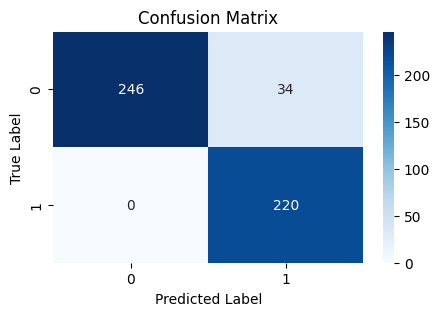

In [ ]:
# Accuracy and confusion matrix
acc_score = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score: {acc_score:0.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'\nClassification Report for k=5:\n')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


##Logistic Regression

In [ ]:
# Train and evaluate Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train.values.ravel())

LogisticRegression(max_iter=1000)

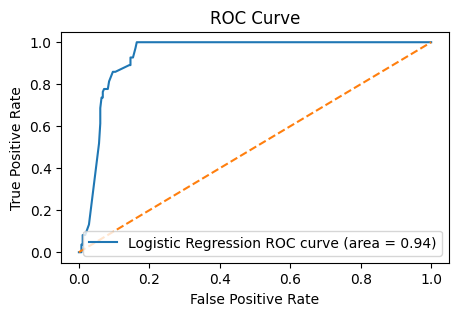

In [ ]:
# Prediction and evaluation for Logistic Regression
y_pred_log_reg = log_reg.predict(X_test_scaled)
if log_reg.classes_.shape[0] > 1:
    y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
    roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)
    fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_proba_log_reg)

    plt.figure(figsize=(5, 3))
    plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression ROC curve (area = {roc_auc_log_reg:0.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [ ]:
# Accuracy and confusion matrix for Logistic Regression
acc_score_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

print(f'Logistic Regression Accuracy Score: {acc_score_log_reg:0.2f}')
print('Logistic Regression Confusion Matrix:')
print(conf_matrix_log_reg)
print('Logistic Regression Classification Report:\n')
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy Score: 0.90
Logistic Regression Confusion Matrix:
[[235  45]
 [  6 214]]
Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.84      0.90       280
           1       0.83      0.97      0.89       220

    accuracy                           0.90       500
   macro avg       0.90      0.91      0.90       500
weighted avg       0.91      0.90      0.90       500



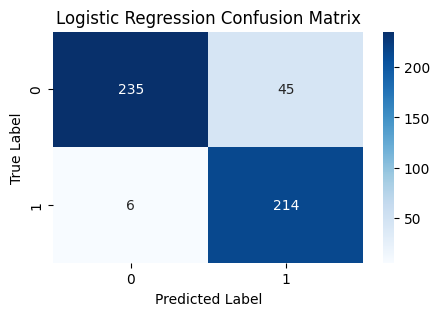

In [ ]:
# Plot Logistic Regression confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [ ]:
# Display Logistic Regression label counts
label_counts_log_reg = np.unique(y_pred_log_reg, return_counts=True)
print('Logistic Regression Label Counts:')
print(dict(zip(label_counts_log_reg[0], label_counts_log_reg[1])))

Logistic Regression Label Counts:
{0: 241, 1: 259}


##SVM

In [ ]:
# Train and evaluate SVM
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train.values.ravel())

SVC(probability=True)

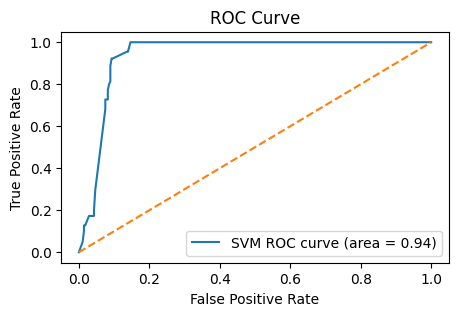

In [ ]:
# Prediction and evaluation for SVM
y_pred_svm = svm.predict(X_test_scaled)
if svm.classes_.shape[0] > 1:
    y_pred_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]
    roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_proba_svm)

    plt.figure(figsize=(5, 3))
    plt.plot(fpr_svm, tpr_svm, label=f'SVM ROC curve (area = {roc_auc_svm:0.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [ ]:
# Accuracy and confusion matrix for SVM
acc_score_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f'SVM Accuracy Score: {acc_score_svm:0.2f}')
print('SVM Confusion Matrix:')
print(conf_matrix_svm)
print('SVM Classification Report:\n')
print(classification_report(y_test, y_pred_svm))

SVM Accuracy Score: 0.91
SVM Confusion Matrix:
[[235  45]
 [  0 220]]
SVM Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       280
           1       0.83      1.00      0.91       220

    accuracy                           0.91       500
   macro avg       0.92      0.92      0.91       500
weighted avg       0.93      0.91      0.91       500



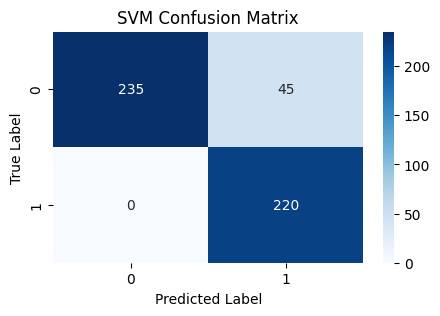

In [ ]:
# Plot SVM confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

In [ ]:
# Display SVM label counts
label_counts_svm = np.unique(y_pred_svm, return_counts=True)
print('SVM Label Counts:')
print(dict(zip(label_counts_svm[0], label_counts_svm[1])))

SVM Label Counts:
{0: 235, 1: 265}


##Decision Tree

In [ ]:
# Train and evaluate Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train.values.ravel())

DecisionTreeClassifier(random_state=42)

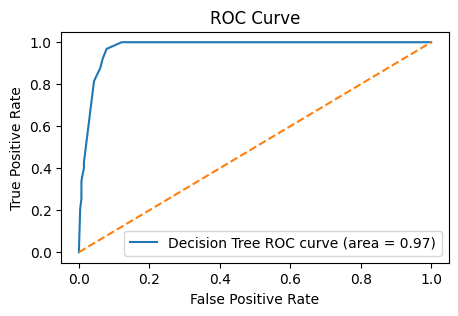

In [ ]:
# Prediction and evaluation for Decision Tree
y_pred_tree = decision_tree.predict(X_test_scaled)
if decision_tree.classes_.shape[0] > 1:
    y_pred_proba_tree = decision_tree.predict_proba(X_test_scaled)[:, 1]
    roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
    fpr_tree, tpr_tree, _ = roc_curve(y_test, y_pred_proba_tree)

    plt.figure(figsize=(5, 3))
    plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree ROC curve (area = {roc_auc_tree:0.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [ ]:
# Accuracy and confusion matrix for Decision Tree
acc_score_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

In [ ]:
print(f'Decision Tree Accuracy Score: {acc_score_tree:0.2f}')
print('Decision Tree Confusion Matrix:')
print(conf_matrix_tree)
print('Decision Tree Classification Report:\n')
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy Score: 0.93
Decision Tree Confusion Matrix:
[[246  34]
 [  0 220]]
Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       280
           1       0.87      1.00      0.93       220

    accuracy                           0.93       500
   macro avg       0.93      0.94      0.93       500
weighted avg       0.94      0.93      0.93       500



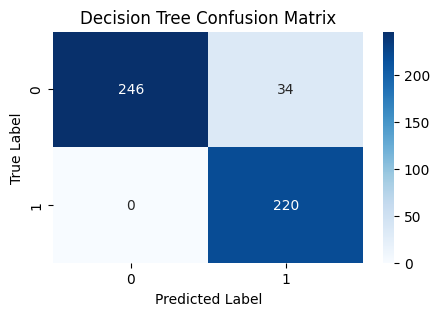

In [ ]:
# Plot Decision Tree confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [ ]:
# Display Decision Tree label counts
label_counts_tree = np.unique(y_pred_tree, return_counts=True)
print('Decision Tree Label Counts:')
print(dict(zip(label_counts_tree[0], label_counts_tree[1])))


Decision Tree Label Counts:
{0: 246, 1: 254}


##Random Forest

In [ ]:
# Train and evaluate Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train.values.ravel())

RandomForestClassifier(random_state=42)

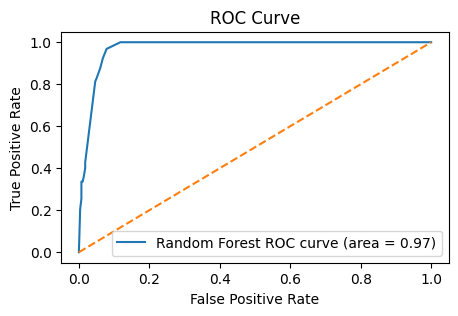

In [ ]:
# Prediction and evaluation for Random Forest
y_pred_rf = random_forest.predict(X_test_scaled)
if random_forest.classes_.shape[0] > 1:
    y_pred_proba_rf = random_forest.predict_proba(X_test_scaled)[:, 1]
    roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

    plt.figure(figsize=(5, 3))
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest ROC curve (area = {roc_auc_rf:0.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [ ]:
# Accuracy and confusion matrix for Random Forest
acc_score_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f'Random Forest Accuracy Score: {acc_score_rf:0.2f}')
print('Random Forest Confusion Matrix:')
print(conf_matrix_rf)
print('Random Forest Classification Report:\n')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy Score: 0.93
Random Forest Confusion Matrix:
[[246  34]
 [  0 220]]
Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       280
           1       0.87      1.00      0.93       220

    accuracy                           0.93       500
   macro avg       0.93      0.94      0.93       500
weighted avg       0.94      0.93      0.93       500



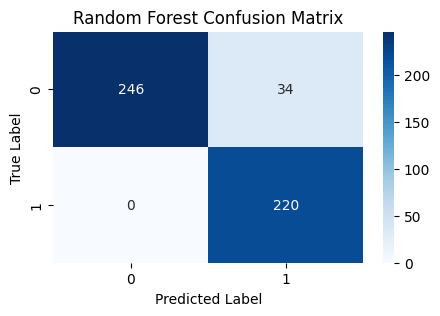

In [ ]:
# Plot Random Forest confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [ ]:
# Display Random Forest label counts
label_counts_rf = np.unique(y_pred_rf, return_counts=True)
print('Random Forest Label Counts:')
print(dict(zip(label_counts_rf[0], label_counts_rf[1])))

Random Forest Label Counts:
{0: 246, 1: 254}


##XGBoost

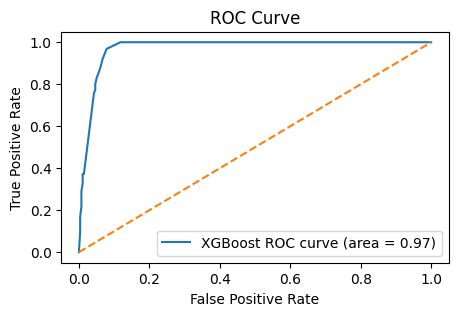

XGBoost Accuracy Score: 0.93
XGBoost Confusion Matrix:
[[246  34]
 [  0 220]]
XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       280
           1       0.87      1.00      0.93       220

    accuracy                           0.93       500
   macro avg       0.93      0.94      0.93       500
weighted avg       0.94      0.93      0.93       500



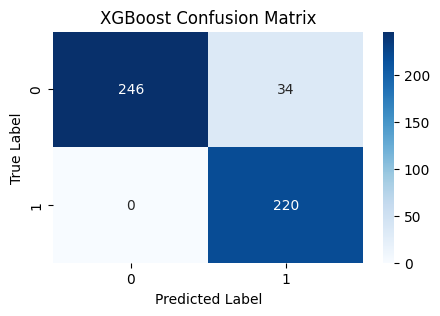

XGBoost Label Counts:
{0: 246, 1: 254}


In [ ]:
# Train and evaluate XGBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgboost.fit(X_train_scaled, y_train.values.ravel())

# Prediction and evaluation for XGBoost
y_pred_xgb = xgboost.predict(X_test_scaled)
if xgboost.classes_.shape[0] > 1:
    y_pred_proba_xgb = xgboost.predict_proba(X_test_scaled)[:, 1]
    roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)

    plt.figure(figsize=(5, 3))
    plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost ROC curve (area = {roc_auc_xgb:0.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Accuracy and confusion matrix for XGBoost
acc_score_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f'XGBoost Accuracy Score: {acc_score_xgb:0.2f}')
print('XGBoost Confusion Matrix:')
print(conf_matrix_xgb)
print('XGBoost Classification Report:\n')
print(classification_report(y_test, y_pred_xgb))

# Plot XGBoost confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Display XGBoost label counts
label_counts_xgb = np.unique(y_pred_xgb, return_counts=True)
print('XGBoost Label Counts:')
print(dict(zip(label_counts_xgb[0], label_counts_xgb[1])))

##ANN

In [ ]:
# Define the neural network architecture with Layer Normalization
model = Sequential([
    Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    LayerNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    LayerNormalization(),
    Dropout(0.5),
    Dense(100, activation='relu'),
    LayerNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    LayerNormalization(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    LayerNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6346 - loss: 0.7939 - val_accuracy: 0.9224 - val_loss: 0.3089
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8499 - loss: 0.4055 - val_accuracy: 0.9347 - val_loss: 0.2540
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8834 - loss: 0.3188 - val_accuracy: 0.9347 - val_loss: 0.2242
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8985 - loss: 0.3203 - val_accuracy: 0.9347 - val_loss: 0.2061
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9072 - loss: 0.2861 - val_accuracy: 0.9365 - val_loss: 0.2004
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9004 - loss: 0.3059 - val_accuracy: 0.9365 - val_loss: 0.1985
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9107 - loss: 0.2723 - val_accuracy: 0.9383 - val_loss: 0.1937
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9213 - loss: 0.2448 - val_accuracy: 0.9365 - v

In [ ]:
# Evaluate the model
y_pred_nn_proba = model.predict(X_test_scaled).ravel()
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)

# ROC curve and AUC
roc_auc_nn = roc_auc_score(y_test, y_pred_nn_proba)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_proba)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


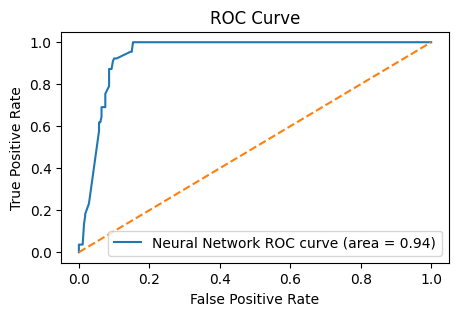

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network ROC curve (area = {roc_auc_nn:0.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
# Accuracy and confusion matrix
acc_score_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

In [ ]:
print(f'Neural Network Accuracy Score: {acc_score_nn:0.2f}')
print('Neural Network Confusion Matrix:')
print(conf_matrix_nn)
print('Neural Network Classification Report:\n')
print(classification_report(y_test, y_pred_nn))

Neural Network Accuracy Score: 0.91
Neural Network Confusion Matrix:
[[233  47]
 [  0 220]]
Neural Network Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       280
           1       0.82      1.00      0.90       220

    accuracy                           0.91       500
   macro avg       0.91      0.92      0.91       500
weighted avg       0.92      0.91      0.91       500



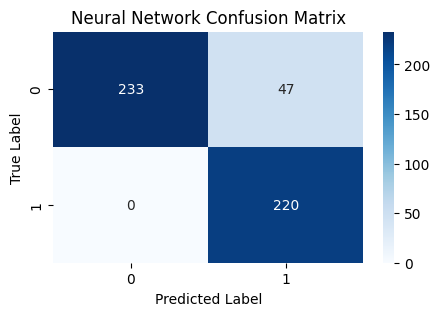

In [ ]:
# Plot neural network confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Neural Network Confusion Matrix')
plt.show()

In [ ]:
# Display neural network label counts
label_counts_nn = np.unique(y_pred_nn, return_counts=True)
print('Neural Network Label Counts:')
print(dict(zip(label_counts_nn[0], label_counts_nn[1])))

Neural Network Label Counts:
{0: 233, 1: 267}
